## Краткое описание проекта

Компании, которая продаёт игры требуется определить факторы, которые повлияют на успех игры на рынке.Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats as st
from IPython.display import display

game_data = pd.read_csv('/datasets/games.csv')
#Приводим колонки к нижнему регистру
game_data.columns= game_data.columns.str.lower()
game_data.head(15)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [2]:
game_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
name               16713 non-null object
platform           16715 non-null object
year_of_release    16446 non-null float64
genre              16713 non-null object
na_sales           16715 non-null float64
eu_sales           16715 non-null float64
jp_sales           16715 non-null float64
other_sales        16715 non-null float64
critic_score       8137 non-null float64
user_score         10014 non-null object
rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [3]:
game_data['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

In [4]:
#critic_score -оценка критиков (100макс)
#user_score - оценка пользователей (10макс)
#rating- рейтинг от организации ESRB (англ. Entertainment Software Rating Board)

Заполним инородные и пропущенные значения. Приведём данные к нужному типу. Оставим пропуски с рейтингом ввиду их уникальности. Строки с пропущенным жанром можно дропнуть или найти информацию в интернете. А год релиза следует перевести в тип int.

Пропуски в оценках могли возникнуть по разным причинам. Например, если игра довольно старая, то ввиду её уникальности или редкости просто не было источников с оценкой пользователей или критиков. Или же на этапе сбора данных были допущены пропуски.

In [5]:
#Преобразуем в Nan для возможных манипуляций , на всякий случай

#0 - будет означать неизвестный год выпуска
# Обработка tbd
game_data['user_score'] = pd.to_numeric(game_data['user_score'], errors="coerce")
game_data.dropna(subset=['year_of_release'], inplace=True)
# Заполнение нулём
game_data['year_of_release'] = (game_data['year_of_release'].fillna(0)).astype(int)

# Замена в столбце rating
game_data['rating'] = game_data['rating'].replace(np.nan, 'undefined')
game_data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,undefined
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,undefined


In [6]:
game_data[game_data['genre']!=game_data['genre']]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993,NaN,1.78,0.53,0.00,0.08,NaN,NaN,undefined
14244,NaN,GEN,1993,NaN,0.00,0.00,0.03,0.00,NaN,NaN,undefined


Эти строчки можно смело удалить

In [7]:
#Удаляем лишнее
game_data = game_data.drop(index=[659, 14244])

In [10]:
game_data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,undefined,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,undefined,31.38


In [9]:
#Посчитаем сумму продаж по всем регионам

game_data['all_sales'] = game_data['na_sales'] + game_data['eu_sales'] + game_data['other_sales'] + game_data['jp_sales']
game_data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,undefined,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,undefined,31.38


# Вывод (шаг 2)
Данные были подготовлены. Переименовали названия колонок для удобности работы с ними, привели колонку с релизом к типу int. Обработали выбивающиеся значения 'tbd' в user_score, заменив на nan и решили, что пока нет надобности заполнять пропуски, потому что такие данные довольно уникальны и лучше было бы их не искажать.Также посчитали суммарные продажи для каждой игры по всем регионам.



* tbd на nan можно было заменить через to_numeric(errors = 'coerce')

* рейтинг можно было заполнить undefined

* пропуски по году можно было дропнуть, их мало, либо оставить просто как есть. Как вариант еще можно было провести группировку по названию игры и измерить медиану по году, наверняка некоторые игры выходят на разных платформах 


# Шаг 3 . Исследовательский анализ данных (EDA)

(1980, 2016)

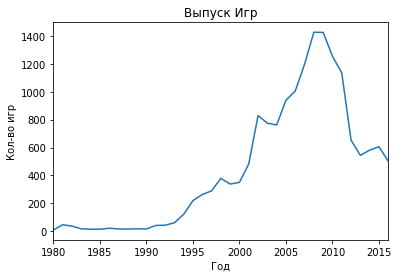

In [11]:
#Посмотрим на линейный график выпуска игр по годам
game_data.groupby('year_of_release')['year_of_release'].count().plot(kind='line')
plt.title('Выпуск Игр')
plt.ylabel('Кол-во игр')
plt.xlabel('Год')
plt.xlim(1980, 2016)

In [12]:
game_data['year_of_release'].unique()

array([2006, 1985, 2008, 2009, 1996, 1989, 1984, 2005, 1999, 2007, 2010,
       2013, 2004, 1990, 1988, 2002, 2001, 2011, 1998, 2015, 2012, 2014,
       1992, 1997, 1993, 1994, 1982, 2016, 2003, 1986, 2000, 1995, 1991,
       1981, 1987, 1980, 1983])


После дропа - всё ок

Относительно низкая и стабильная активность до середины 90-х, после наблюдается уверенный подъём вверх вплоть до 2010 года с 2мя небольшими просадками. Наибольшая активность наблюдается примерно с 2002 по 2012, после идёт на на спад к 16му году. А наивысшая с 2006 по 2011- самые игровые года.

Можно утвердить, что период с 80е по 90е не очень важен, так как активность выпуска довольна слаба по сравнению с другими периодами.

Мы видим, что до 94-95 игр выпускалось крайне мало, вероятно индустрия только зарождалась. Скачок произошел с 2001-2002 и длился до пика 2008-2009 года, после чего количество выпускаемых игр пошло на спад, полагаю это может быть связано с разивтием мобильной индустрии, увеличением времени и средств на разработку игр



Шаг 3. Проведите исследовательский анализ данных Посмотрите, сколько игр выпускалось в разные годы. Важны ли данные за все периоды? Посмотрите, как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы? Возьмите данные за соответствующий актуальный период. Актуальный период определите самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год. Не учитывайте в работе данные за предыдущие годы. Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ. Постройте график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишите результат. Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы. Соотнесите выводы с продажами игр на других платформах. Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

In [13]:
#Посмотрим как менялись продажи по платформам
game_data['platform'].unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

In [14]:
game_data

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,undefined,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,undefined,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,undefined,0.01
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,undefined,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,undefined,0.01
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,undefined,0.01


In [15]:
game_data['platform'].unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

In [16]:
game_data.groupby('platform')['all_sales'].sum().sort_values(ascending=False)

platform
PS2     1233.56
X360     961.24
PS3      931.34
Wii      891.18
DS       802.78
PS       727.58
PS4      314.14
GBA      312.88
PSP      289.53
3DS      257.81
PC       255.76
GB       254.43
XB       251.57
NES      251.05
N64      218.01
SNES     200.04
GC       196.73
XOne     159.32
2600      86.48
WiiU      82.19
PSV       53.81
SAT       33.59
GEN       28.35
DC        15.95
SCD        1.86
NG         1.44
WS         1.42
TG16       0.16
3DO        0.10
GG         0.04
PCFX       0.03
Name: all_sales, dtype: float64

Платформы, не влияющие на продажи стоит убрать

In [18]:
#Делаем срез по словарю
platforms = game_data.groupby('platform')['all_sales'].sum().sort_values(ascending=False)[0:15]
platforms_dict = dict(platforms)
platforms_dict
# и обновляем индекс
# game_data = game_data.query('platform in @platforms_dict').reset_index(drop=True)
df_top15 = game_data.query('platform in @platforms_dict').reset_index(drop=True)

Список самых продающих платформ

In [19]:
#Контроль
game_data.groupby('platform')['all_sales'].sum().sort_values(ascending=False)

platform
PS2     1233.56
X360     961.24
PS3      931.34
Wii      891.18
DS       802.78
PS       727.58
PS4      314.14
GBA      312.88
PSP      289.53
3DS      257.81
PC       255.76
GB       254.43
XB       251.57
NES      251.05
N64      218.01
SNES     200.04
GC       196.73
XOne     159.32
2600      86.48
WiiU      82.19
PSV       53.81
SAT       33.59
GEN       28.35
DC        15.95
SCD        1.86
NG         1.44
WS         1.42
TG16       0.16
3DO        0.10
GG         0.04
PCFX       0.03
Name: all_sales, dtype: float64

In [20]:
platform_sales = game_data.pivot_table(index='year_of_release', columns='platform', values='all_sales', aggfunc='sum')


In [21]:
pl_main = platform_sales[['PC', 'PS', 'PS2', 'PS3', 'PSP', 'XOne', 'X360', 'PS4', 'PSV']]

In [22]:
pl_main

platform,PC,PS,PS2,PS3,PSP,XOne,X360,PS4,PSV
year_of_release,,,,,,,,,
1980,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1981,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1982,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1983,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1984,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1985,0.04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1986,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1987,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1988,0.03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


[None, None]

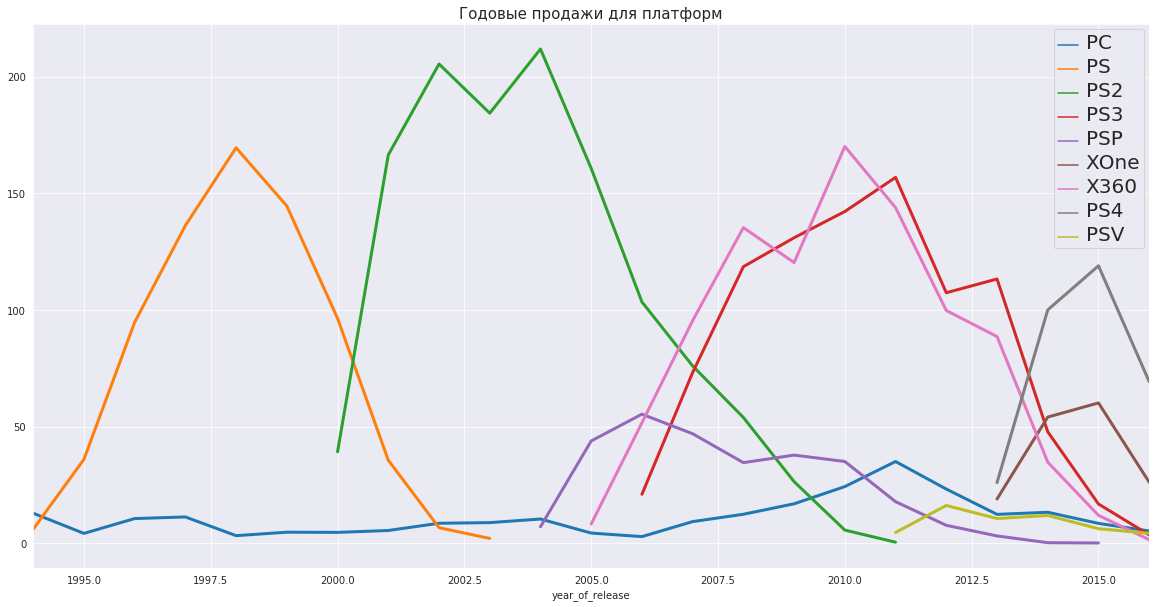

In [23]:
sns.set_style('darkgrid')
plt.figure(figsize=(20,10))
plt.title('Годовые продажи для платформ', fontsize=15)
plt.xlim(1994,2016)
ax = sns.lineplot(data=pl_main, dashes=False, linewidth=3)

plt.setp(ax.get_legend().get_texts(), fontsize='20') # for legend text
plt.setp(ax.get_legend().get_title(), fontsize='30')



После удаления 0 графики пришли в порядок


Вывел сначала то, что у нашего поколения слуху:). Как видим, PS первая даёт толчок продажам среди известных консолей - 140млн проданных копей к 98 году, потом активность стихает и тут выходит ps2 в 2000 году и опять резкий подъём вплоть до 2005 года. Судя по временным интервалам обе консоли продержались около 7 лет, а то и 10 в случае ps2. Видим с появлением новых приставок появляется больше заинтересованных геймеров. Более новое поколение приставок X360 и PS3 выходит на рынок 2005-2006 и идут с отрывом в пользу xbox до 11 года(в эти года xbox многих привлёк) , после чего их покупка идёт на спад 14-15 год. В 13 году выходит новое поколение приставок, которые имеют место быть и по сей день, но объёмы продаж не такие как у прошлых судя по спаду на графике, да и интерес к xbox'у не такой как к ps4

ПК по сравнению с остальными консолями стабилен в продажах - линия на протяжении периода не доходит до отметки 50 млн. копий.


однако рассуждения хорошие, мы видим, что считай все наши лидеры по суммарным продажам за все время уже к 2016 году завершают свой жизненный цикл, остаются только самые свежие. При этом наблюдается явная смена поколений, когда выходит новая версия и продажи предыдущей резко падают


Утвердим, что приблизительный срок жизни игровых платформ варьируется от 7 до 10 лет

In [37]:
platform_sales

platform,2600,3DO,3DS,DC,DS,GB,GBA,GC,GEN,GG,...,SAT,SCD,SNES,TG16,WS,Wii,WiiU,X360,XB,XOne
year_of_release,,,,,,,,,,,,,,,,,,,,,
1980,11.38,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1981,35.68,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1982,28.88,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1983,5.84,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1984,0.27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1985,0.45,NaN,NaN,NaN,0.02,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1986,0.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1987,1.94,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1988,0.74,NaN,NaN,NaN,NaN,1.43,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


[None, None]

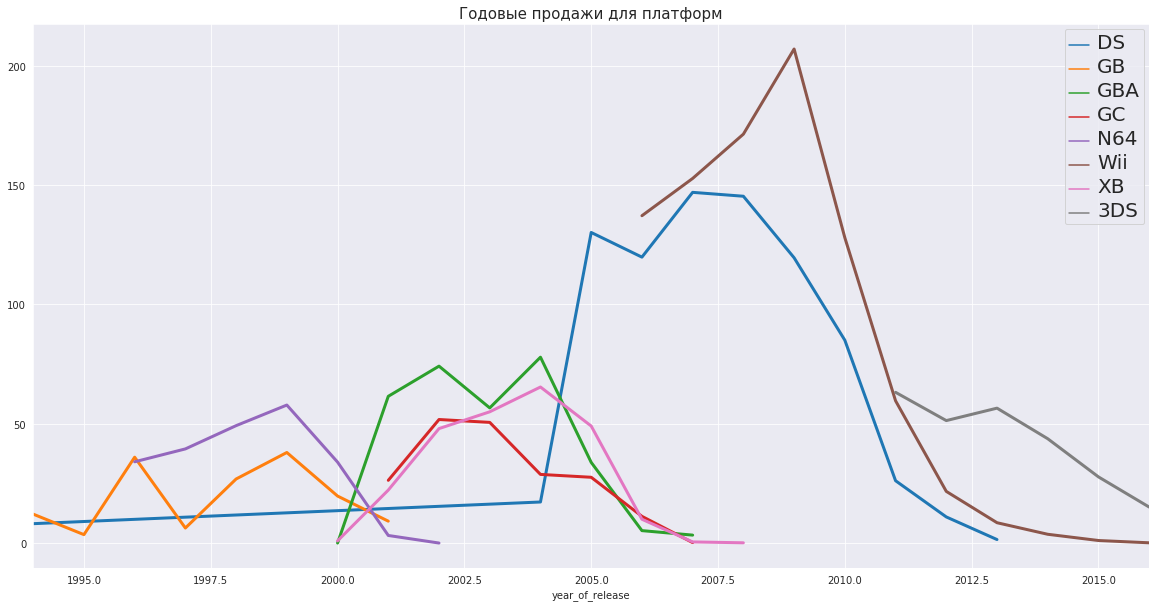

In [44]:
#Взлянем на другие платформы
pl_other = platform_sales[['DS', 'GB', 'GBA', 'GC', 'N64', 'Wii', 'XB', '3DS']]

plt.figure(figsize=(20,10))
plt.title('Годовые продажи для платформ', fontsize=15)
plt.xlim(1994,2016)
ax = sns.lineplot(data=pl_other, dashes=False, linewidth=3)

plt.setp(ax.get_legend().get_texts(), fontsize='20') # for legend text
plt.setp(ax.get_legend().get_title(), fontsize='30')



Здесь до 2000 дают о себе знать GB(наверное, это gameboy) с пиковыми точками 96 и 98, где они продавали примерно 25 млн копий, а Nintendo64 обгоняет его на пике в 98 по продажам почти в 2 раза. В 2000 , видимо, приходит новая версия GB - GBA и уже демонстрирует высокие объёмы продаж по сравнению с предыдущими поколениями 1,5раза и с 2004года уходит на спад 2006-7. В 2004 Nintendo DS захватывает рынок и держит его на протяжении 6 лет, а потом уходит на спад. Лидирующие объёмы продаж в этот промежуток набрала Wii с 2005 ,пик 2008-2009 и и спад активности к 15му году.

На мой взгляд, потенциально прибыльными платформами являются Xbox(360, One) PS(2,3,4) и Nintendo 

Сделаем вывод, что длительность жизни серьёзной игровой платформы 7-10лет.

/opt/conda/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


Text(0.5, 1.0, 'Распределения проданных копий с 2012 по 2016')

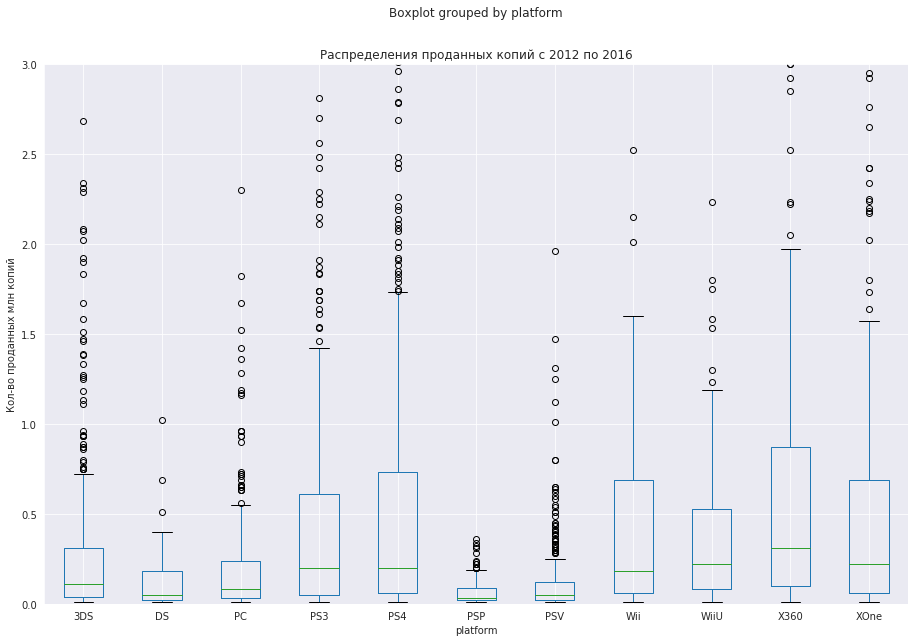

In [24]:
#Сделаем срез для актуального временного промежутка

#Посмотрим на глобальные продажи для каждой платформы
data_new = game_data.query('year_of_release>= 2012')
data_new.boxplot(column='all_sales', by='platform', figsize=(15,10))
plt.ylim(0,3)
plt.ylabel('Кол-во проданных млн копий')
plt.title('Распределения проданных копий с 2012 по 2016')


На данном графике видим, что почти все платформы имеют аномальные значения по числу проданных копий, кроме платформы GB. Это связано со сдержанной амплитудой графика и почти равными скачками, которые могут компенсировать друг друга, также предполагаю, что данная консоль расчитана на младшую аудиторию, отсюда стабильность. Судя по медианным значениям и границам усов - лидерующие позиции в продажах занимают N64, PS3, X360, да и остальные их собратья , особенно ранние версии. А в пролёте остаются PSP и неожиданно ПК. Другие платформы тоже хорошо себя показали, даже учитывая аномальные значения.

In [25]:
data_new.groupby('platform')['all_sales'].sum().sort_values(ascending=False)

platform
PS4     314.14
PS3     288.79
X360    236.54
3DS     194.61
XOne    159.32
WiiU     82.19
PC       62.65
PSV      49.18
Wii      35.37
DS       12.55
PSP      11.19
Name: all_sales, dtype: float64

График показал, что PS3 XBOX360 идут по объёмам продаж почти что вровень, но ps всё же впереди. Игры для пк по сравнению с остальными платформами не так хорошо себя зарекомендовали, аналогично DC GC. DS и 3DS - показали себя хорошо, учитывая смену консоли, но у первой больше выбросов ,что указывает на более обильные продажи. Если сравнить PSP и PSV , то первая сильно обгоняет вторую, видимо обновление платформы не так зацепило геймеров. А что касается консоли недавних поколений -PS4 показала себя лучше Xone - шире границы усов и учащенные выбросы это подтверждают.


Хорошие рассуждения, таким образом отбросив платформы, которые уже завершают жизненный цикл и падают, ставку можно сделать на PS4 \ XOne \ 3DS ну и стабильный PC


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f56f7898c90>,
      dtype=object)

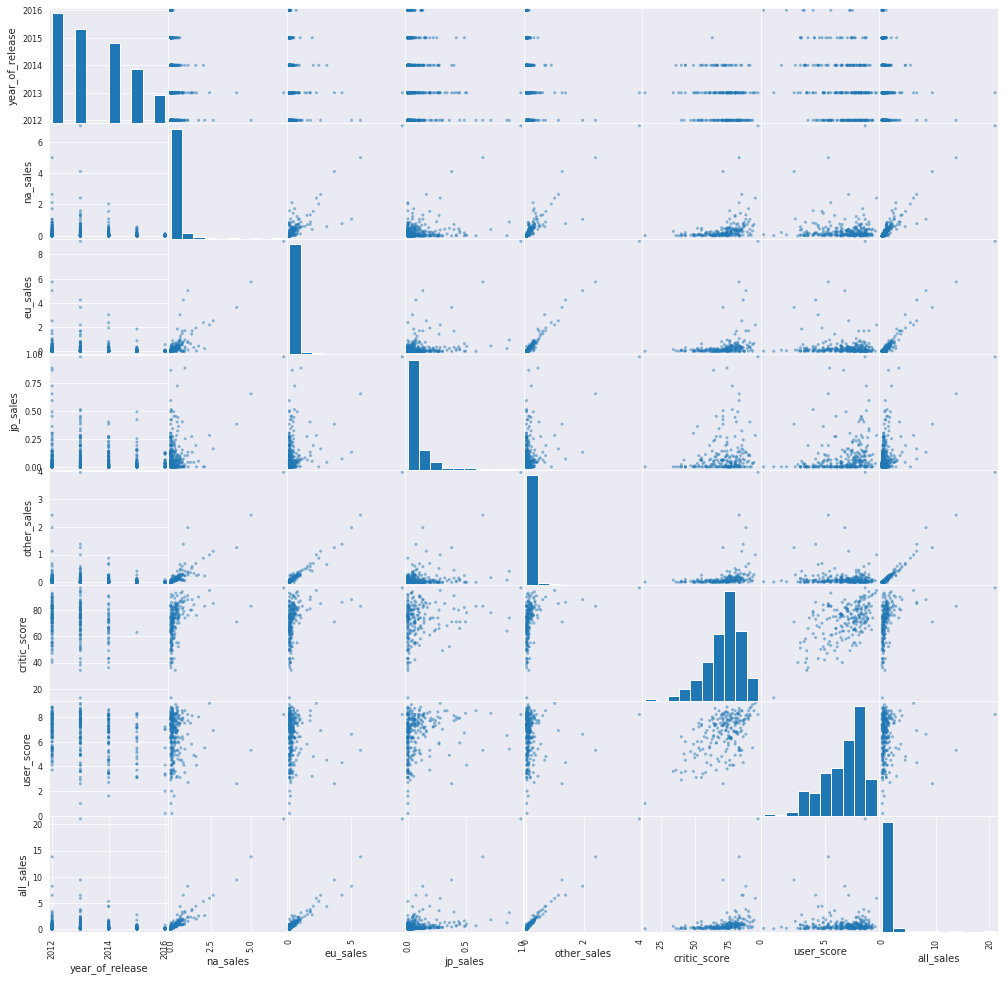

In [26]:
#Построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами внутри одной игровой платформы.
#Возьмём PS3
ps3 = data_new.query('platform=="PS3"')

pd.plotting.scatter_matrix(ps3, figsize=(17,17))

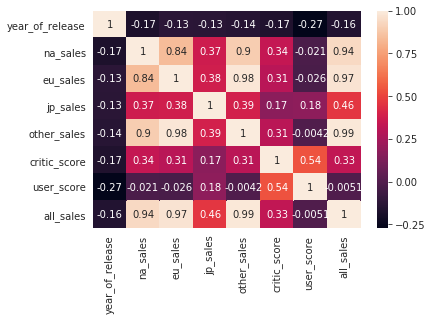

In [28]:
sns.heatmap(ps3.corr(), annot=True)

In [29]:
ps3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 493 entries, 16 to 16710
Data columns (total 12 columns):
name               493 non-null object
platform           493 non-null object
year_of_release    493 non-null int64
genre              493 non-null object
na_sales           493 non-null float64
eu_sales           493 non-null float64
jp_sales           493 non-null float64
other_sales        493 non-null float64
critic_score       214 non-null float64
user_score         283 non-null float64
rating             493 non-null object
all_sales          493 non-null float64
dtypes: float64(7), int64(1), object(4)
memory usage: 50.1+ KB


По диаграмме рассеивания и корреляционной матрице видно, что высокие отзывы критиков могут соотноситься с большими продажами, как по всему миру, так и в отдельных частях. Например, на все продажи отзывы влияют умеренно (коэф-т корреляции 0,43), а что касаемо отдельных стран, то в Северной Америке отзывы играют большую роль чем в других странах, т.к как корреляция положительно- это значит, что чем больше коэффициент тем положительнее влияние на целевой признак, т.е продажи. Значит, отзывы критиков могут сработать на увеличение продаж. Отзывы самих пользователей тоже имеют значение, но оно меньше чем у критиков (0,12). Отзывы пользователей особенно ценятся в Японии, когда отзывы критиков влияния не оказывают.

На совмещенных графиках продаж с разных платформ мы видим, что продажи PS3 XBOX360 идут с отрывом в пользу Xbox'a, попробуем это объяснить тем, что платформа была(к слову PS3 переживала 3й цикл) новая и появление каких-нибудь эксклюзивов дало хорошие отзывы критиков и объёмные продажи пошли на рост. Популярность xbox'a чуть спала к 2011 и ps3 подвинул его по продажам.


Корреляция с критиками действительно лучше, чем с пользователями. Однако хочется отметить, что предпочтения людей меняются со временем, поэтому объективнее было бы взять более свежие платформы по каждой направленности платформы: например PS4 \ XOne по стационарным, а 3DS по портативным. Это бы позволило оценить актуальную корреляцию.
    


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f56f4808790>,
      dtype=object)

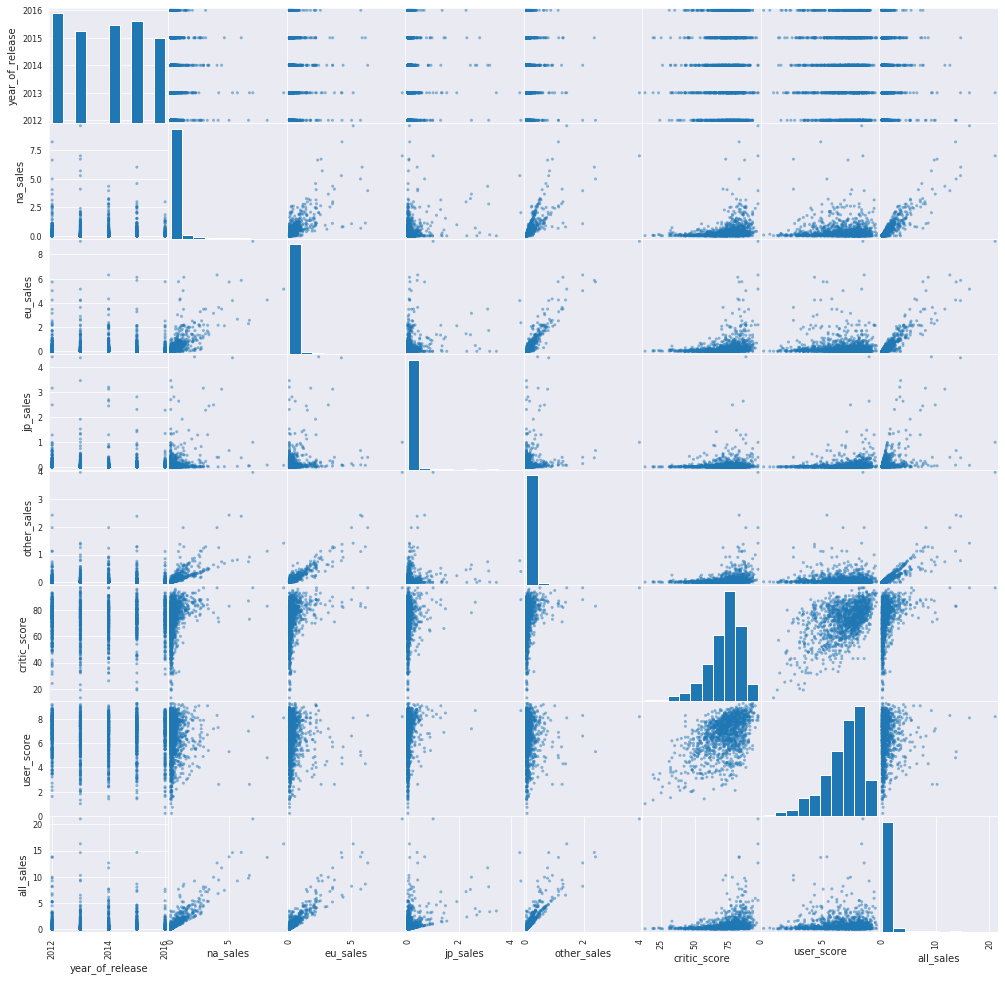

In [30]:
#Посмотрим как обстоят дела на более свежих платформах


pd.plotting.scatter_matrix(data_new, figsize=(17,17))

Text(0.5, 1, 'Для всех консолей')

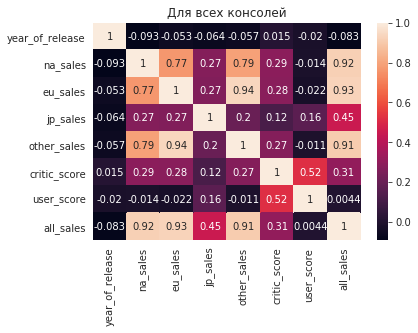

In [31]:
sns.heatmap(data_new.corr(), annot=True)
plt.title('Для всех консолей')

In [33]:
#Посмотрим отдельно корреляции для более свежих портативных и стационарных консолей .
stat_pl = game_data.query('platform=="PS4" or platform=="XOne"')
port_pl = game_data.query('platform=="DS" or platform=="DS3"')


Text(0.5, 1, 'Для стационарных')

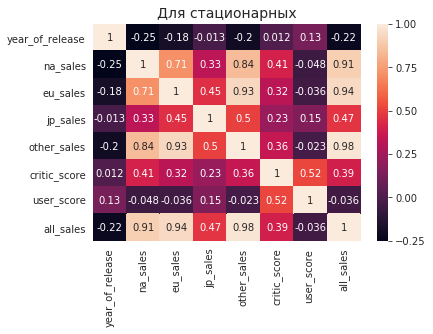

In [35]:
sns.heatmap(stat_pl.corr(), annot=True)
plt.title('Для стационарных', fontsize=14)

Text(0.5, 1, 'Для портативных')

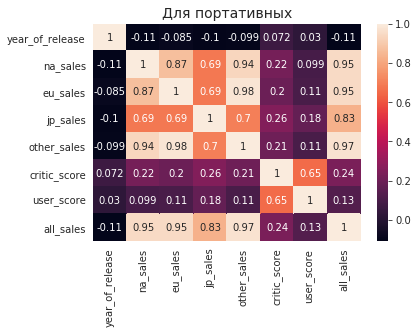

In [36]:
sns.heatmap(port_pl.corr(), annot=True)
plt.title('Для портативных', fontsize=14)


Если обобщить корреляцию на все консоли получим, что в действительности отзывы пользователей практически не оказывают никакого влияния на продажи, в отличие от критиков. Но если смотреть по продажам в Японии, то именно там они оказывают большое влияние в особенности на продажу портативных устройств, а также и стационраных. Ещё ,что интересно отметить, это то что отзывы пользователй всё таки коррелирует с оценкой критиков. 

Text(0.5, 1.0, 'Продажи игр разных жанров во всём мире')

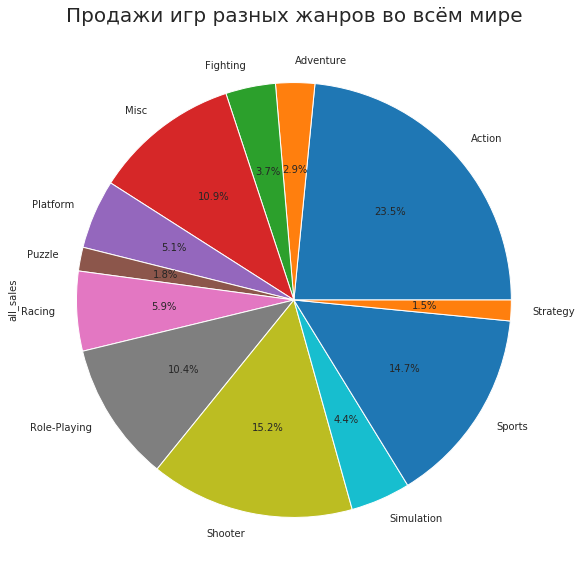

In [72]:
plt.figure(figsize=(10,10))
grouped_by_genre_all = data_new.groupby('genre')['all_sales'].sum()
grouped_by_genre_all.plot.pie(autopct="%.1f%%")
plt.title('Продажи игр разных жанров во всём мире', fontsize=20)

Text(0.5, 1.0, 'Продажи игр разных жанров в Северной Америке')

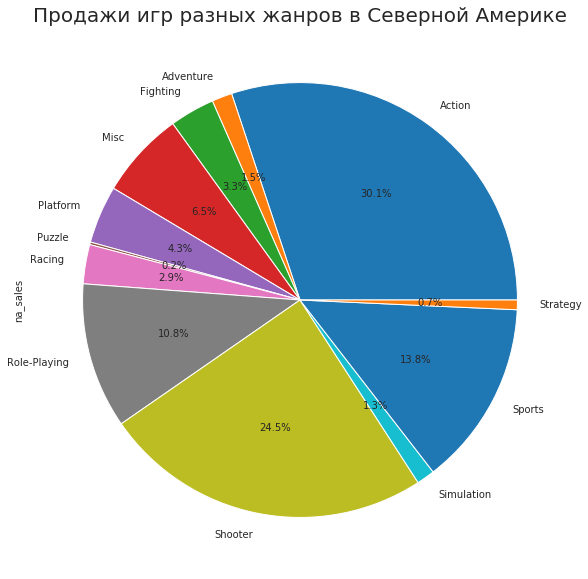

In [37]:
plt.figure(figsize=(10,10))
grouped_by_genre_all = data_new.groupby('genre')['na_sales'].sum()
grouped_by_genre_all.plot.pie(autopct="%.1f%%")
plt.title('Продажи игр разных жанров в Северной Америке', fontsize=20)

Text(0.5, 1.0, 'Продажи игр разных жанров в Европе')

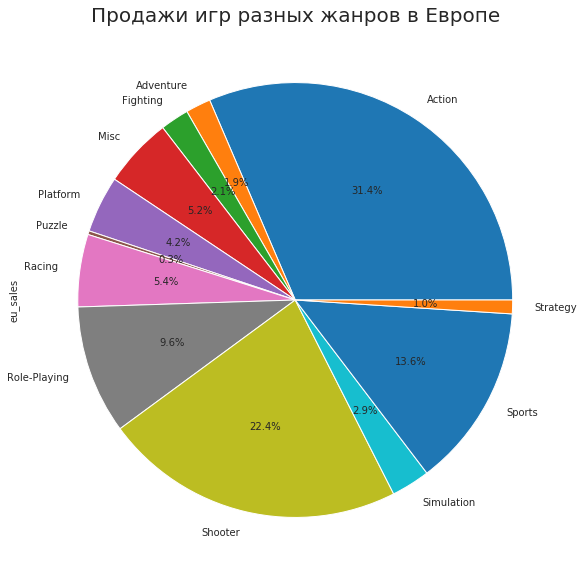

In [39]:
plt.figure(figsize=(10,10))
grouped_by_genre_all = data_new.groupby('genre')['eu_sales'].sum()
grouped_by_genre_all.plot.pie(autopct="%.1f%%")
plt.title('Продажи игр разных жанров в Европе', fontsize=20)

Text(0.5, 1.0, 'Продажи игр разных жанров в Японии')

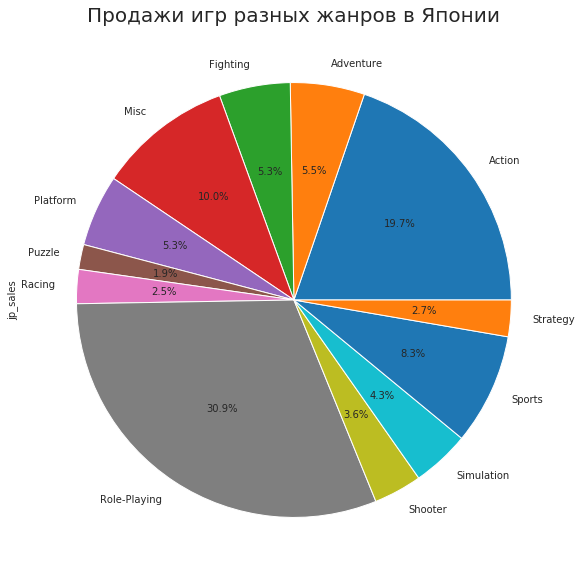

In [75]:
plt.figure(figsize=(10,10))
grouped_by_genre_all = data_new.groupby('genre')['jp_sales'].sum()
grouped_by_genre_all.plot.pie(autopct="%.1f%%")
plt.title('Продажи игр разных жанров в Японии', fontsize=20)

Text(0.5, 1.0, 'Продажи игр разных жанров в других странах')

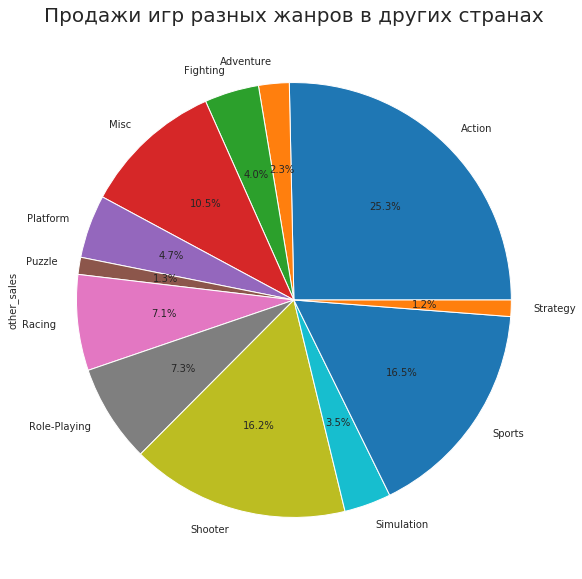

In [76]:
plt.figure(figsize=(10,10))
grouped_by_genre_all = data_new.groupby('genre')['other_sales'].sum()
grouped_by_genre_all.plot.pie(autopct="%.1f%%")
plt.title('Продажи игр разных жанров в других странах', fontsize=20)

 Круговые диаграммы показали нам, что рсапеределение продаж по жанрам во всём мире /Северной Америке/Европе почти совпадают, у Японии распределение изменено сильнее. Самый любимый жанр во всём мире считается Экшн, за ним идут Спорт и Шутеры, а в стратегии играют меньше всего, но не в Японии(там меньше всего играют в шутеры). Заключим, что во всём мире ходовые жанры- Экшн, Спорт, Шутеры и Гонки, а в Японии- Ролевые, Экш и Гонки.

<div class="alert alert-block alert-success">
<b>КОММЕНТАРИЙ РЕВЬЮВЕРА:</b> 
    
Молодец, хороший анализ!
    
</div>
<div class="alert alert-block alert-warning">
<b>КОММЕНТАРИЙ РЕВЬЮВЕРА:</b> 
    
    
Единственное, я бы хотя бы в рамках общих продаж (не по регионам) проанализировал кол-во выпускаемых игр в жанре, а также средние продажи
</div>

In [40]:
# Проанализируем кол-во выпускаемых игр в различных жанрах

data_new.groupby('genre')['name'].count().sort_values(ascending=False)

genre
Action          1031
Role-Playing     370
Adventure        302
Sports           268
Shooter          235
Misc             192
Racing           115
Fighting         109
Platform          85
Simulation        80
Strategy          71
Puzzle            28
Name: name, dtype: int64

In [41]:
genre_cnt = data_new.pivot_table(index='year_of_release', columns='genre', values='name', aggfunc='count')


[None, None]

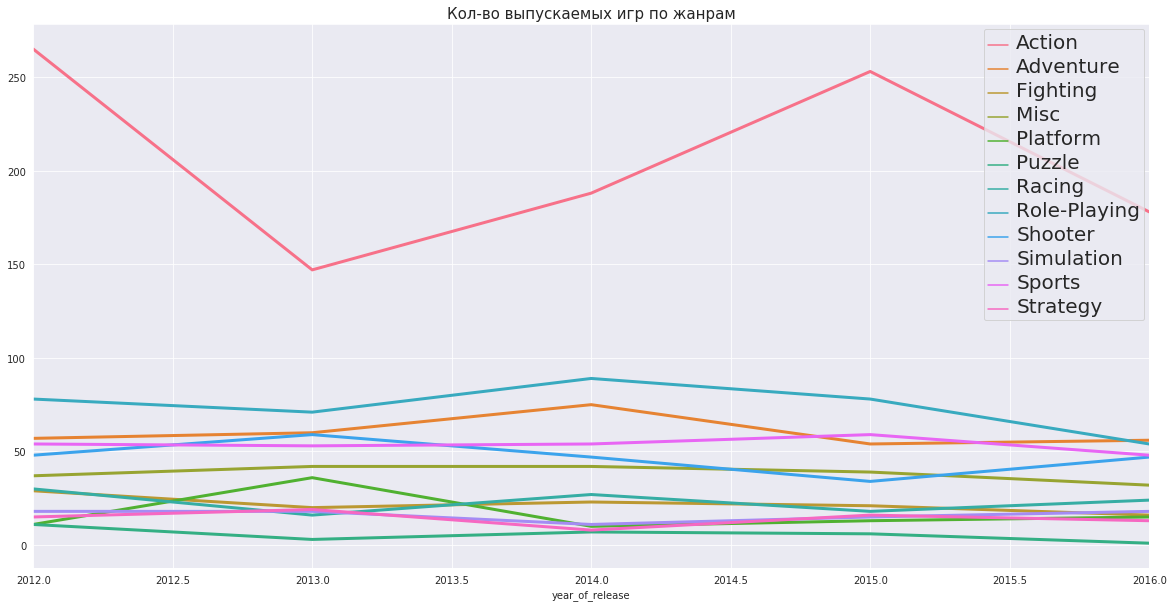

In [44]:
plt.figure(figsize=(20,10))
plt.title('Кол-во выпускаемых игр по жанрам', fontsize=15)
plt.xlim(2012,2016)
ax = sns.lineplot(data=genre_cnt, dashes=False, linewidth=3)

plt.setp(ax.get_legend().get_texts(), fontsize='20') # for legend text
plt.setp(ax.get_legend().get_title(), fontsize='30')

[None, None]

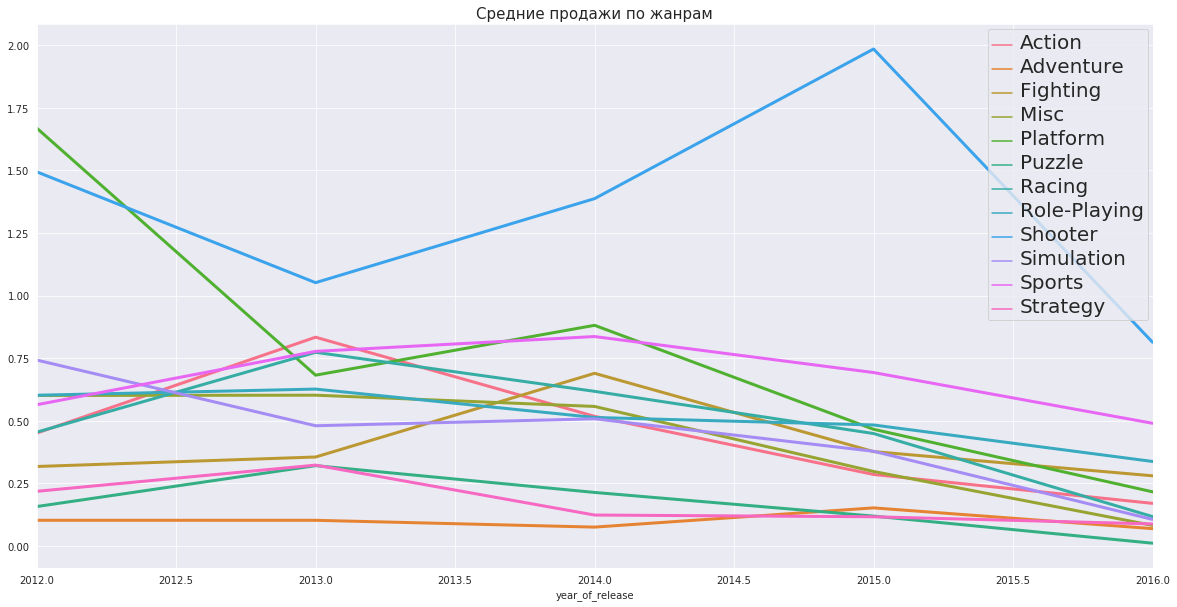

In [46]:
genre_mean_sales = data_new.pivot_table(index='year_of_release', columns='genre', values='all_sales', aggfunc='mean')
plt.figure(figsize=(20,10))
plt.title('Средние продажи по жанрам', fontsize=15)
plt.xlim(2012,2016)
ax = sns.lineplot(data=genre_mean_sales, dashes=False, linewidth=3)

plt.setp(ax.get_legend().get_texts(), fontsize='20') # for legend text
plt.setp(ax.get_legend().get_title(), fontsize='30')

Обобщим что по количеству выпускаемых игр жанр Экшн превосходит остальные, при этом держа тренд с 2007 по 16 года, но со своими взлётами и падениями. Что касается остальных жанров, то до 2012 года после Экшена по выпуску шли Приключения, Спорт и Platform , а потом просели. Мало выпускаются стратегии, паззлы и симуляторы.

Что касется средних продаж, то здесь лидирующие позиции занимают платформеры и шутеры. Платформеры держут позицию до 13го года, а после идут на спад. Шутеры остаются в тренде до 15года. Слабо продаваемые- Симуляторы, стратегии паззлы


Видим, что первенство по суммарным продажам у некоторых жанров судя по всему может достигаться из-за штампования огромного кол-ва дешевых игр (экшн), либо высокой цены (шутер)


# Вывод. (Шаг 3)

После проведения исследовательского анализа данных выяснили актуальный период для игровой индустрии, судя по выпуску игр и объёмам их продаж. Взяли период с  2012 по 2016 год.Получили, что игры начали динамично выпускаться с 95го года, резко набирая объёмы продаж до 2010 года, после чего линия графика плавно опускается вниз. 
    

    
Далее мы вяснили самые популярные платформы - ими оказались PS, PS2, DS, Xbox, Wii PS3, PS4,Xone, Xbox360,DS, 3DS, Wii, WiiU,PSP а также по графику определили, что примерное время жизни игровых платформ составляет от 7 до 10 лет. Когда посмотрели на boxplot'ы определили, что PC PSP имеют далеко не высокие объёмы продаж. Из перспективных платформ на ближайшее врмя можно выделить PS4, XOne, 3DS, PC, PSV. Но предпочтительнее PS4 и XOne, так как являются лидерами продаж.
    

Также изучили влияние оценок критиков на продажи и поняли, что хорошие отзывы предполагают высокие продажи.
  

Интерес к разным игровым жанрам во всём мире примерно одинаков, но в Японии ,как мы выяснили, любят больше всего RP.

# Шаг 4. Портрет пользователя каждого региона

In [51]:
#Составим топ-игровых платформ для геймеров Северной Америки
na_grouped = data_new.groupby('platform')['na_sales'].sum().sort_values(ascending=False)
na_total_sum = na_grouped.sum()
df_na_grouped = pd.DataFrame(data_new.groupby('platform')['na_sales'].sum().sort_values(ascending=False))

In [52]:
df_na_grouped['user_part_percent'] = (df_na_grouped['na_sales'] / na_total_sum)*100
df_na_grouped.iloc[0:5]

,na_sales,user_part_percent
platform,,
X360,140.05,23.698326
PS4,108.74,18.400257
PS3,103.38,17.493274
XOne,93.12,15.757145
3DS,55.31,9.359189


In [53]:
#Составим топ-игровых платформ для геймеров Европы
eu_grouped = data_new.groupby('platform')['eu_sales'].sum().sort_values(ascending=False)
eu_total_sum = na_grouped.sum()
df_eu_grouped = pd.DataFrame(data_new.groupby('platform')['eu_sales'].sum().sort_values(ascending=False))

df_eu_grouped['user_part_percent'] = (df_eu_grouped['eu_sales'] / eu_total_sum)*100
df_eu_grouped[0:5]

,eu_sales,user_part_percent
platform,,
PS4,141.09,23.874308
PS3,106.86,18.082136
X360,74.52,12.609777
XOne,51.59,8.729716
3DS,42.64,7.215256


In [54]:
#Составим топ-игровых платформ для геймеров Японии
jp_grouped = data_new.groupby('platform')['jp_sales'].sum().sort_values(ascending=False)
jp_total_sum = jp_grouped.sum()
df_jp_grouped = pd.DataFrame(data_new.groupby('platform')['jp_sales'].sum().sort_values(ascending=False))

df_jp_grouped['user_part_percent'] = (df_jp_grouped['jp_sales'] / jp_total_sum)*100
df_jp_grouped[0:5]

,jp_sales,user_part_percent
platform,,
3DS,87.79,45.586250
PS3,35.29,18.324852
PSV,21.04,10.925330
PS4,15.96,8.287465
WiiU,13.01,6.755634


In [55]:
#Составим топ-игровых платформ для геймеров других стран
other_grouped = data_new.groupby('platform')['other_sales'].sum().sort_values(ascending=False)
other_total_sum = other_grouped.sum()
df_other_grouped = pd.DataFrame(data_new.groupby('platform')['other_sales'].sum().sort_values(ascending=False))

df_other_grouped['user_part_percent'] = (df_other_grouped['other_sales'] / other_total_sum)*100
df_other_grouped[0:5]

,other_sales,user_part_percent
platform,,
PS4,48.35,30.961834
PS3,43.26,27.702357
X360,20.40,13.063525
XOne,14.27,9.138064
3DS,8.87,5.680072


Text(0, 0.5, 'млн копий')

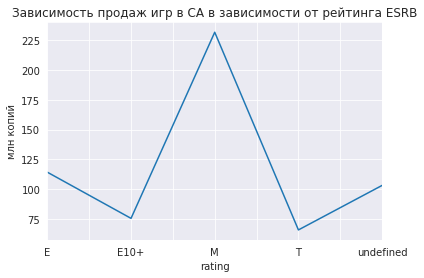

In [57]:
#Проверим зависимость рейтинга ESRB от продаж

data_new_with_rating = data_new.query('rating==rating')
data_new_with_rating.groupby('rating')['na_sales'].sum().plot(kind='line')
plt.title('Зависимость продаж игр в СА в зависимости от рейтинга ESRB')
plt.ylabel('млн копий')

Text(0, 0.5, 'млн копий')

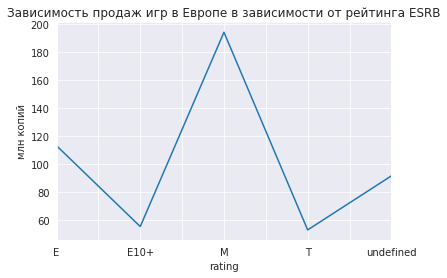

In [58]:

data_new_with_rating.groupby('rating')['eu_sales'].sum().plot(kind='line')
plt.title('Зависимость продаж игр в Европе в зависимости от рейтинга ESRB')
plt.ylabel('млн копий')

Text(0, 0.5, 'млн копий')

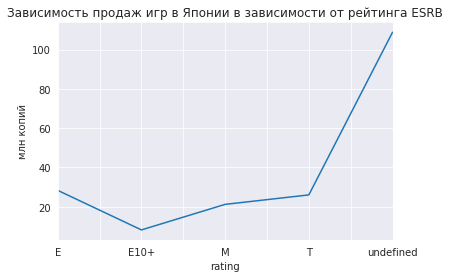

In [59]:

data_new_with_rating.groupby('rating')['jp_sales'].sum().plot(kind='line')
plt.title('Зависимость продаж игр в Японии в зависимости от рейтинга ESRB')
plt.ylabel('млн копий')

Text(0, 0.5, 'млн копий')

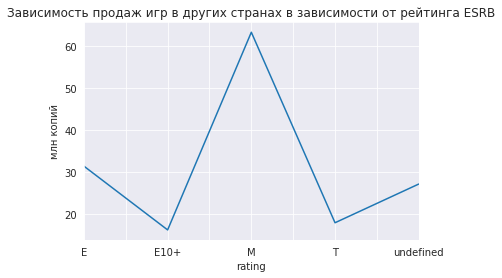

In [60]:

data_new_with_rating.groupby('rating')['other_sales'].sum().plot(kind='line')
plt.title('Зависимость продаж игр в других странах в зависимости от рейтинга ESRB')
plt.ylabel('млн копий')

Зависимость продаж от рейтинга ESRB присутствует, но на Японию оказывает не такое воздействие как на другие регионы. EС,RP(Rating pending) - слабо продается, а M,E,E10 в топе по кол-ву продаж.

# Вывод (Шаг 4)


За взятый нами актульный период с 2012 по 2016 год - самые большие процентные доли покупателей - это В СА - XBXOX360(23%),  PS4 (23% - Европа, 30%- другие страны). Также можно сказать, что во всех регионах хорошо покупают игры на PS3, PS4, Xbox360,3DS, XOne.


По сути видим, что тенденция то осталась схожей, только вот платформы уже поменялись на более свежие, но у нас как и ранее Америка с Европой очень схожи: стационарные консоли \ динамичные игры \ высокий рейттинг, тогда как Япония отличается сильно: иные жанровые предпочтения \ портативные консоли \ спокойные игры


# Шаг 5. Проверка гипотез

In [62]:
# Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;

data_new_with_user_score = data_new.query('user_score==user_score')
pc_user_score = data_new_with_user_score[data_new_with_user_score['platform']=='PC']
pc_user_score_samp = list(map(float, list(pc_user_score['user_score'])))

xbox_user_score = data_new_with_user_score[data_new_with_user_score['platform']=='XOne']
xbox_user_score_samp = list(map(float, list(xbox_user_score['user_score'])))
pc_user_score_samp


[4.0,
 3.9,
 7.9,
 4.8,
 7.9,
 4.2,
 2.2,
 6.0,
 5.4,
 7.9,
 6.7,
 5.5,
 8.2,
 7.5,
 6.2,
 8.2,
 5.7,
 5.9,
 4.2,
 9.3,
 8.2,
 8.5,
 8.0,
 7.7,
 5.5,
 6.7,
 6.5,
 6.2,
 3.0,
 6.8,
 8.3,
 5.9,
 6.0,
 8.2,
 4.7,
 7.6,
 5.8,
 4.5,
 4.6,
 6.6,
 7.6,
 5.5,
 8.0,
 6.9,
 2.1,
 5.4,
 7.5,
 7.5,
 6.6,
 6.2,
 4.2,
 5.9,
 8.0,
 5.9,
 3.3,
 7.3,
 7.0,
 7.3,
 7.1,
 6.9,
 8.2,
 5.6,
 7.3,
 8.2,
 5.9,
 6.5,
 4.4,
 7.9,
 3.2,
 8.6,
 8.6,
 4.3,
 7.4,
 7.4,
 3.5,
 7.1,
 8.2,
 4.9,
 8.1,
 4.8,
 6.4,
 7.5,
 7.4,
 7.8,
 8.2,
 6.9,
 8.4,
 5.3,
 8.9,
 7.6,
 3.8,
 3.0,
 8.7,
 7.3,
 2.5,
 7.1,
 8.2,
 7.9,
 6.0,
 7.0,
 4.2,
 6.4,
 7.4,
 7.3,
 4.4,
 5.7,
 5.7,
 4.8,
 4.3,
 7.6,
 5.7,
 6.9,
 6.9,
 8.0,
 5.8,
 6.5,
 7.5,
 3.3,
 7.7,
 8.5,
 8.4,
 8.6,
 8.0,
 7.9,
 8.0,
 5.7,
 4.4,
 5.8,
 6.8,
 6.8,
 2.9,
 7.4,
 8.2,
 6.9,
 6.7,
 7.4,
 3.6,
 5.1,
 6.5,
 3.4,
 5.4,
 7.5,
 8.6,
 4.3,
 5.9,
 5.7,
 8.0,
 7.0,
 7.6,
 3.8,
 7.1,
 4.0,
 6.2,
 7.7,
 7.0,
 3.5,
 4.8,
 7.5,
 6.1,
 6.3,
 8.3,
 8.7,
 6.8,
 7.6,
 8.1,
 5.3,
 6.9

Сформулируем гипотезы и проведём статистический тест.



Гипотеза **H0**: Средние пользовательские рейтинги Xbox One и PC одинаковые<br>
Гипотеза **H1**: Средние рейтинги не равны

Проеврим дисперсии выборок


In [64]:
pc_user_score_samp_var = np.var(pc_user_score_samp)
xbox_user_score_samp_var = np.var(xbox_user_score_samp)

print('Дисперсия рейтинга PC:', pc_user_score_samp_var)
print('Дисперсия рейтинга xbox one', xbox_user_score_samp_var)

Дисперсия рейтинга PC: 2.7569952398906588
Дисперсия рейтинга xbox one 1.8965188383045526


Т.к дисперсии не равный выставим var_equal=False

In [66]:
alpha = .05
results = st.ttest_ind(pc_user_score_samp, xbox_user_score_samp, equal_var=False)
print('p-value:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Принимаем") 
    

p-value: 0.5489537965134912
Принимаем


Сделаем предположение,что средние значения рейтингов платформ PC и Xbox One равны, p-value попало в 97% доверительный интервал

Проведём другой тест, чтобы проверить утверждение - (Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.)

Гипотеза **H0**: Средние пользовательских рейтингов жанров Экшн и Спорт равны<br>
Гипотеза **H1**: Средние отличаются

In [68]:
data_new['genre'].unique()

array(['Action', 'Shooter', 'Role-Playing', 'Platform', 'Misc',
       'Simulation', 'Sports', 'Fighting', 'Racing', 'Strategy',
       'Adventure', 'Puzzle'], dtype=object)

In [69]:
data_new_action = data_new.query('genre=="Action" and user_score==user_score')
data_new_sports = data_new.query('genre=="Sports" and user_score==user_score')

action_samp = list(map(float, list(data_new_action['user_score'])))
sports_samp = list(map(float, list(data_new_sports['user_score'])))

action_samp_var = np.var(action_samp)
sports_samp_var = np.var(sports_samp)
print("Дисперсия для Экшн:", action_samp_var)
print("Дисперсия для Спорт:", sports_samp_var)

Дисперсия для Экшн: 1.8854720340439224
Дисперсия для Спорт: 3.0073882971729127


In [70]:
#Проводим тест
alpha = .05
results = st.ttest_ind(action_samp, sports_samp, equal_var=False)
print('p-value:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Принимаем") 
    

p-value: 4.24307776572644e-20
Отвергаем нулевую гипотезу


Предполгаем, что средние значения рейтингов для данных жанров отличаются, значит поставленное утверждение имеет место быть.


Видим, что у нас действительно есть основания отвергнуть Но, делаем вывод, что между оценками по выбранным жанрам имеются статистически значимые различия



# Вывод (шаг 5)

Мы отвергли утверждения о том , что средние рейтинги жанров Экшн и Спорта равны. Тест показал, что равенство не имеет места быть. Также посморели на гипотезы о равентсве средних рейтингов пользователей Xbox One и PC и тест принял гипотезу, что средние равны.

# Шаг 6 <br>
### Общий вывод

 Провели анализ рынка компьютерных игр для разных платформ и регинов, чтобы выяснить какие факторы оказывают влияние на успешность продажи игр. Сделали простую предобработку - переименовали колонки(привели к нижнему регистру), исправили столбцы на нужный тип, а пропуски в рейтингах не стали заполнять, считая что эти значения уникальны, а ещё посчитали суммарные продажи по всем регионам. После провели исследоавательский анализ данных, где мы обнаружили ряд особенностей. Первое, что активные продажи компьютерных игр начались примерно с 95го года и росли, набирая большие обороты до 2010 года, а дальше продажи берут тренд на уменьшение.Мы посмотрели совмещенные графики продаж с разных платформ и изучили их динамику роста. Пришли к мнению, что жизненный цикл серьёзной игровой платформы составляет 7-10 лет. На совмещённых boxplota'х мы исследовали продажи за весь актуальный период 2012-2016 и большинство платформ показали себя неплохо, В Топ попали XBOX360, PS3, PS4, DS, 3DS, XOne не такие уж и сильные продажи продемонстрировали PC, PSP, PSV . Рассмотрели факторы, которые влияли на продажи, с помощью диаграмм рассеивания и корреляционной матрицы выявили, что на продажу во всём мире большее влияние на продажи оказывает отзывы критиков,чем пользователей. Ситуация в Японии показала обратное, что пользовательские отзывы лучше отражаются на продажах портативных устройств. Отобразили круговые диаграммы продаж жанров для разных стран. Самые популярные жанры во всём мире - Экшн, Спорт, Шутеры, в Японии ситуация другая- популярнее всех RP-жанр, а шутеров- меньше всех покупателей. Менее популярные жанры во всех сегментах - Стратегии, Приключения, Драки. После составили портрет для пользователей Северной Америки, Европы, Японии и других стран получили, что большу долю на рынке(30%) занимает PS4 в других странах, а на рынке СА большую долю занимает XBOX360. Во всех регионах топ-5 популярных консолей примерно таков - PS3, PS4, Xbox360, XOne, 3DS. В Японии боьшую долю рынка занимает 3DS и остальные отечественные платформы PS3, PS4, PSV, WiiU. PSV получает особенную популярность именно в Японии. Также стоит отметить,что при смене поколений приставок XboxOne, PS4, Всё же PlayStation сдерживает лидирующие позиции в продажах. Изучили влияние рейтинга ESRB на продажи. Игры с рейтингом M (18+) занимают самые высокие объёмы продажи, меньше продаж у RP(Rating Pending) и у детских игр. Поставили гипотезы о равенстве среднего по рейтингам:1)Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
    2)Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.
И проверили их с помощью статистических тестов, которые показали, что  Средний рейтинги для xbox one и pc могут cовпадать, а средние рейтинги для жанров Экшн и Спорт предположительно разные.
    По итогу, следует сказать, что успешность игры на рынке определяют платформы, отзывы критиков и не так значительно пользователей, жанр и регион (Потому что не каждые жанры популярны в разных странах, например RP не так популярен в других странах, как в Японии), жизненные рамки определённых платформ, а также рейтинг ESRB. 
    
    